In [1]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('data/2017.csv')
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [18]:
df = df.drop(['Country', 'Happiness.Rank'], 1)
df.head()

,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [19]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3', 'x4','x5','x6','x7','x8','x9','x10'])

In [20]:
scaled_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.000000,0.994201,1.000000,0.864065,0.952160,0.839045,0.965323,0.431957,0.680505,0.693215
1,0.996903,0.991528,0.996514,0.792394,0.963086,0.834726,0.951019,0.423924,0.863156,0.706605
2,0.993187,1.000000,0.981126,0.791458,1.000000,0.877892,0.952775,0.567420,0.330657,0.709893
3,0.991123,0.987333,0.989245,0.836545,0.941845,0.903779,0.942001,0.346686,0.790440,0.693102
4,0.985962,0.980138,0.986065,0.771648,0.956334,0.852200,0.938780,0.292913,0.824047,0.749120


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


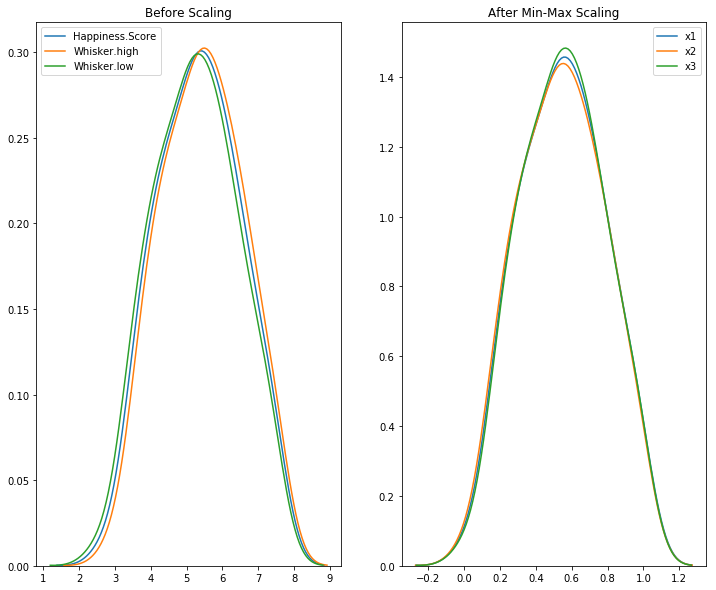

In [22]:
#정규화 전후 결과 비교
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Happiness.Score'], ax=ax1)
sns.kdeplot(df['Whisker.high'], ax=ax1)
sns.kdeplot(df['Whisker.low'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

In [29]:
df2 = pd.DataFrame(df[["Happiness.Score", "Family"]])
df2.head()

,Happiness.Score,Family
0,7.537,1.533524
1,7.522,1.551122
2,7.504,1.610574
3,7.494,1.516912
4,7.469,1.540247


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
Happiness.Score    155 non-null float64
Family             155 non-null float64
dtypes: float64(2)
memory usage: 2.5 KB


In [45]:
X= df2.iloc[:, [0,1]].values
X

array([[7.53700018, 1.53352356],
       [7.52199984, 1.55112159],
       [7.50400019, 1.61057401],
       [7.49399996, 1.51691175],
       [7.46899986, 1.54024673],
       [7.37699986, 1.42893922],
       [7.31599998, 1.48134899],
       [7.31400013, 1.54819512],
       [7.28399992, 1.47816217],
       [7.28399992, 1.51004195],
       [7.21299982, 1.37628996],
       [7.079     , 1.41640365],
       [7.00600004, 1.45994496],
       [6.99300003, 1.41992056],
       [6.97700024, 1.55823112],
       [6.95100021, 1.47252035],
       [6.89099979, 1.4623127 ],
       [6.86299992, 1.45758367],
       [6.71400023, 1.49646008],
       [6.65199995, 1.28402495],
       [6.64799976, 1.26641023],
       [6.63500023, 1.431306  ],
       [6.60900021, 1.43388522],
       [6.59899998, 1.44045115],
       [6.57800007, 1.21086216],
       [6.57200003, 1.35381436],
       [6.52699995, 1.48841166],
       [6.454     , 1.41222787],
       [6.454     , 1.25558519],
       [6.45200014, 1.37319255],
       [6.

In [39]:
from sklearn.cluster import KMeans
score=[]

In [40]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
    
score

[209.77903055326567,
 69.11712800088837,
 33.83887008830362,
 23.40500765466672,
 15.568660868549603,
 11.784772796220828,
 9.44051216669644,
 8.099288844129543,
 7.3192832886916666,
 6.467482418142399]

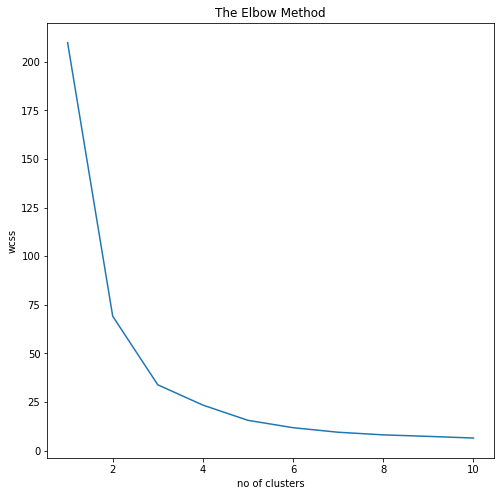

In [41]:
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [46]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [49]:
pd.DataFrame(X[y_kmeans]).head()

,0,1
0,7.504,1.610574
1,7.504,1.610574
2,7.504,1.610574
3,7.504,1.610574
4,7.504,1.610574


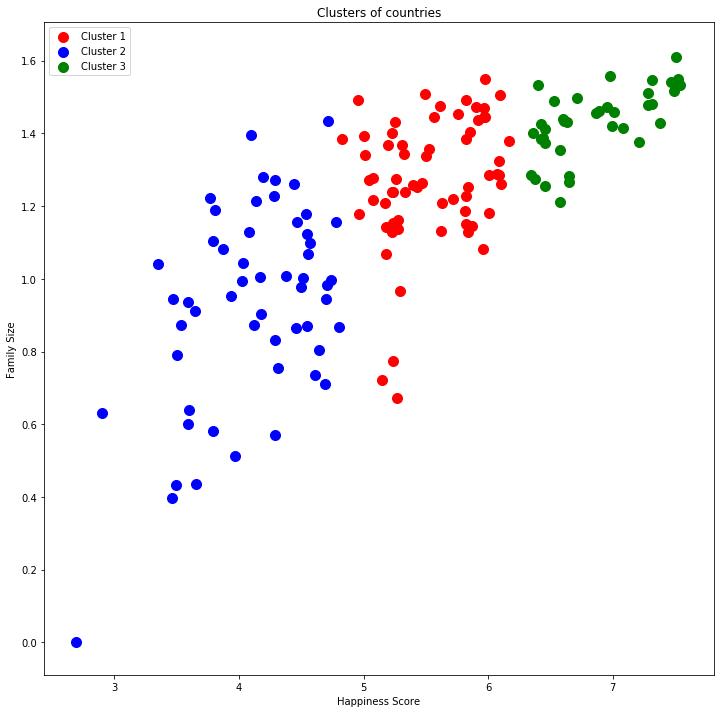

In [44]:
plt.figure(figsize=(12, 12))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of countries')
plt.xlabel('Happiness Score')
plt.ylabel('Family Size')
plt.legend()
plt.show()
